案例一  SMA 案例分析  加载需要的类库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

加载股票数据 青岛啤酒

In [2]:
TsingTao=pd.read_csv('TsingTao.csv')
TsingTao.index=TsingTao.iloc[:,1]

In [3]:
TsingTao.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2014-01-02,1,2014-01-02,48.80,48.98,46.90,47.81,2592800
2014-01-03,2,2014-01-03,47.60,48.38,47.01,47.59,1560700
2014-01-06,3,2014-01-06,47.63,47.79,46.62,46.70,1860900
2014-01-07,4,2014-01-07,46.48,47.15,45.48,46.51,2934400
2014-01-08,5,2014-01-08,46.46,46.88,46.00,46.51,1800400


格式化相关数据 转换时间字段的数据类型

In [4]:
TsingTao.index=pd.to_datetime(TsingTao.index, format='%Y-%m-%d')
TsingTao=TsingTao.iloc[:,2:]
TsingTao.head(n=3)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,48.80,48.98,46.90,47.81,2592800
2014-01-03,47.60,48.38,47.01,47.59,1560700
2014-01-06,47.63,47.79,46.62,46.70,1860900


In [5]:
Close=TsingTao.Close

按照收盘价绘制2014年的时序图

C:\Users\netease\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2014年青岛啤酒股票收盘价时序图')

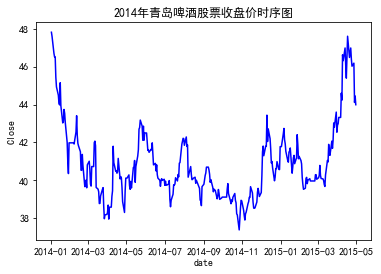

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close,'b')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('2014年青岛啤酒股票收盘价时序图')

新增一个字段 用来存放sma5的数据  sma 代表简单移动平均线  5代表 5天周期

In [7]:
Sma5=pd.Series(0.0,index=Close.index)

for i in range(4,len(Close)):
    Sma5[i]=np.mean(Close[(i-4):(i+1)])

Sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

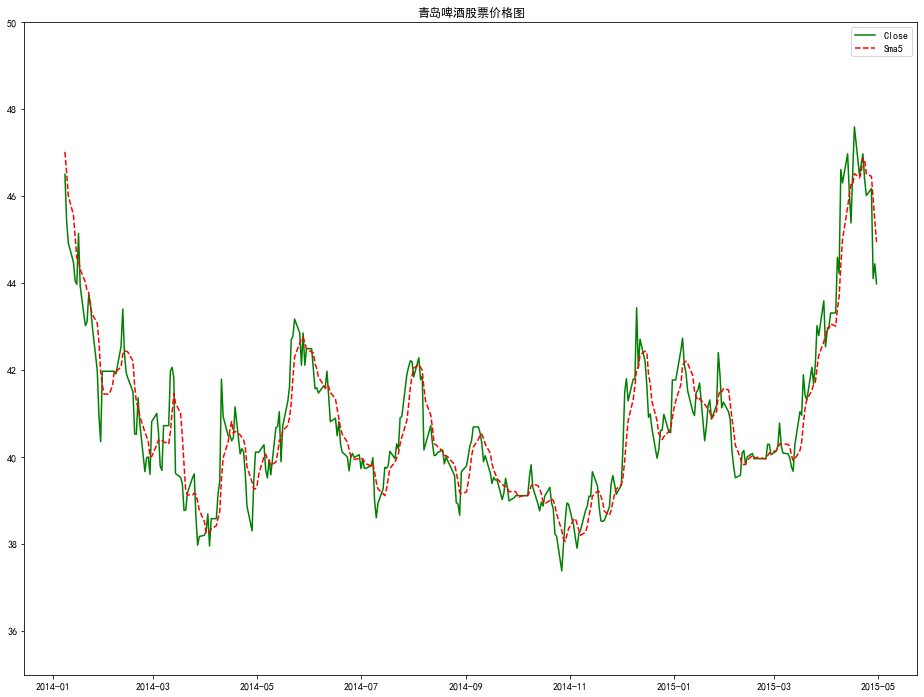

In [8]:
plt.figure(figsize=(16,12))
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.title("青岛啤酒股票价格图")
plt.ylim(35,50)
plt.legend()

新增一个字段 用来存放sma20的数据  sma 代表简单移动平均线  20代表 20天周期

In [9]:
Sma20=pd.Series(0.0,index=Close.index)

for i in range(19,len(Close)):
    Sma20[i]=np.mean(Close[(i-19):(i+1)])

Sma20.tail()

Date
2015-04-24    45.2840
2015-04-27    45.4130
2015-04-28    45.4915
2015-04-29    45.5685
2015-04-30    45.6185
dtype: float64

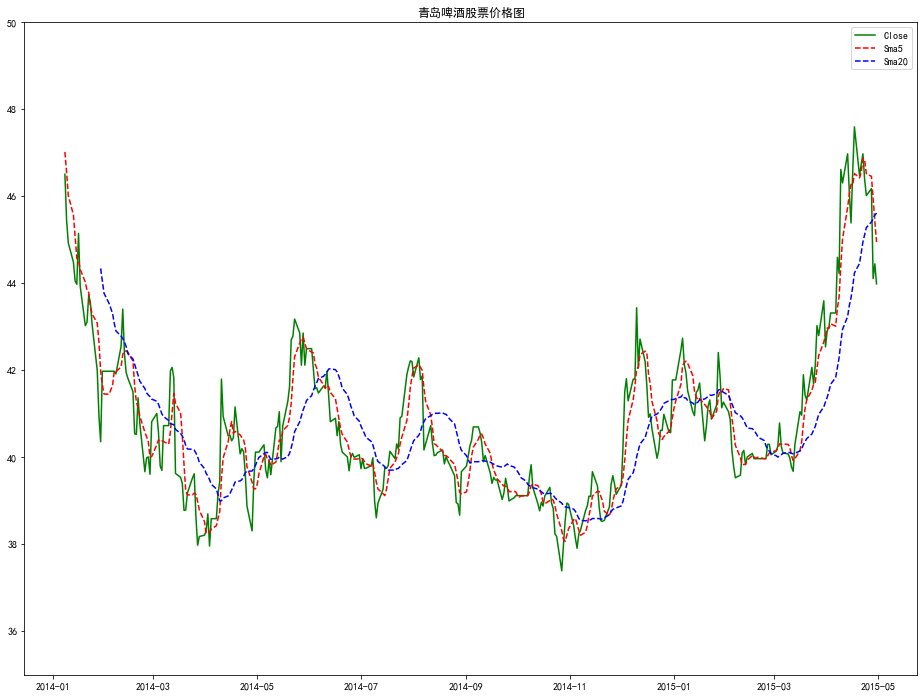

In [10]:
plt.figure(figsize=(16,12))
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.plot(Sma20[19:],label="Sma20",color='b',linestyle='dashed')
plt.title("青岛啤酒股票价格图")
plt.ylim(35,50)
plt.legend()

In [11]:
##    Sma5[i]=np.mean(Close[(i-4):(i+1)])
##    Sma20[i]=np.mean(Close[(i-19):(i+1)])

In [12]:
list_a = [2,4,5,6]
Sma=pd.Series(list_a)
Sma

0    2
1    4
2    5
3    6
dtype: int64

In [13]:
def smaCal(tsPrice,k):
    import pandas as pd
    Sma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice)):   #为什么这里要用k-1
        Sma[i]=sum(tsPrice[(i-k+1):(i+1)])/k  #  这里实现了平均值算法
    return(Sma)

In [14]:
sma5=smaCal(Close ,5)     # 大家查看close是什么   
sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

案例二   WMA 案例分析

In [15]:
b=np.array([1,2,3,4,5])  # 股份占比
w=b/sum(b)              # 提问  sum(b)是什么
w

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [16]:
m1Close=Close[0:5]

In [17]:
m1Close

Date
2014-01-02    47.81
2014-01-03    47.59
2014-01-06    46.70
2014-01-07    46.51
2014-01-08    46.51
Name: Close, dtype: float64

In [18]:
wec=w*m1Close
wec                # 询问各位同学 为什么是这个结果

Date
2014-01-02     3.187333
2014-01-03     6.345333
2014-01-06     9.340000
2014-01-07    12.402667
2014-01-08    15.503333
Name: Close, dtype: float64

In [19]:
sum(wec)

46.778666666666666

WMA5 是什么含义  ？？ wma  加权平均移动线 5 代表 5个数据作为一组

In [20]:
Wma5=pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    Wma5[i]=sum(w*Close[(i-4):(i+1)])   # 提问 为什么前四天是 0 
Wma5[0:7]

Date
2014-01-02     0.000000
2014-01-03     0.000000
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
2014-01-09    46.250667
2014-01-10    45.710667
dtype: float64

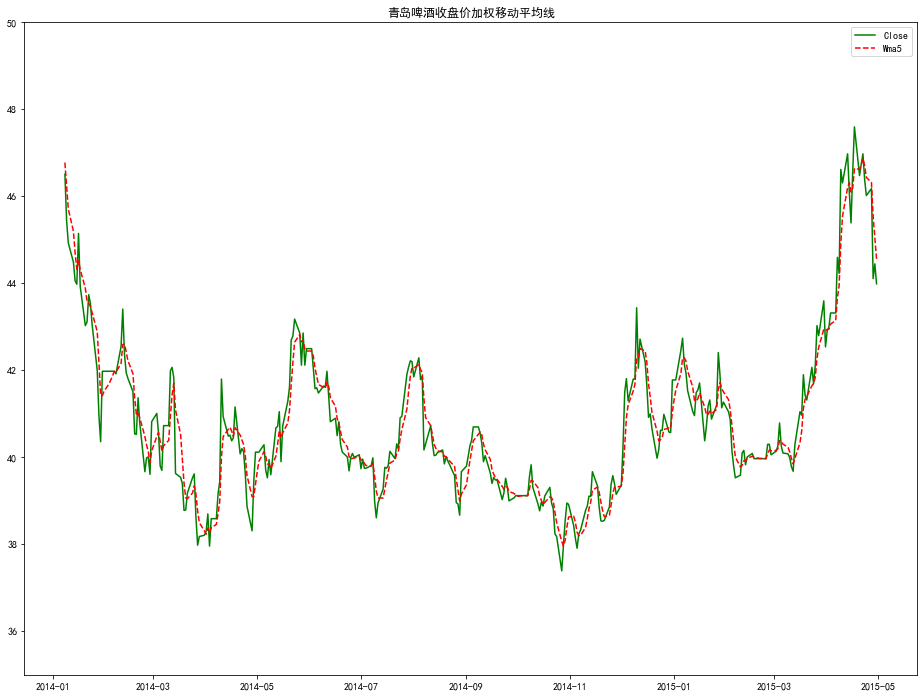

In [21]:
plt.figure(figsize=(16,12))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.title("青岛啤酒收盘价加权移动平均线")
plt.ylim(35,50)
plt.legend()

In [22]:
b=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])  # 股份占比
w2=b/sum(b)              # 提问  sum(b)是什么
w2

array([0.00833333, 0.01666667, 0.025     , 0.03333333, 0.04166667,
       0.05      , 0.05833333, 0.06666667, 0.075     , 0.08333333,
       0.09166667, 0.1       , 0.10833333, 0.11666667, 0.125     ])

In [23]:
Wma15=pd.Series(0.0,index=Close.index)
for i in range(14,len(Close)):
    Wma15[i]=sum(w2*Close[(i-14):(i+1)])   # 
Wma15[0:15].tail()

Date
2014-01-16     0.000000
2014-01-17     0.000000
2014-01-20     0.000000
2014-01-21     0.000000
2014-01-22    44.366083
dtype: float64

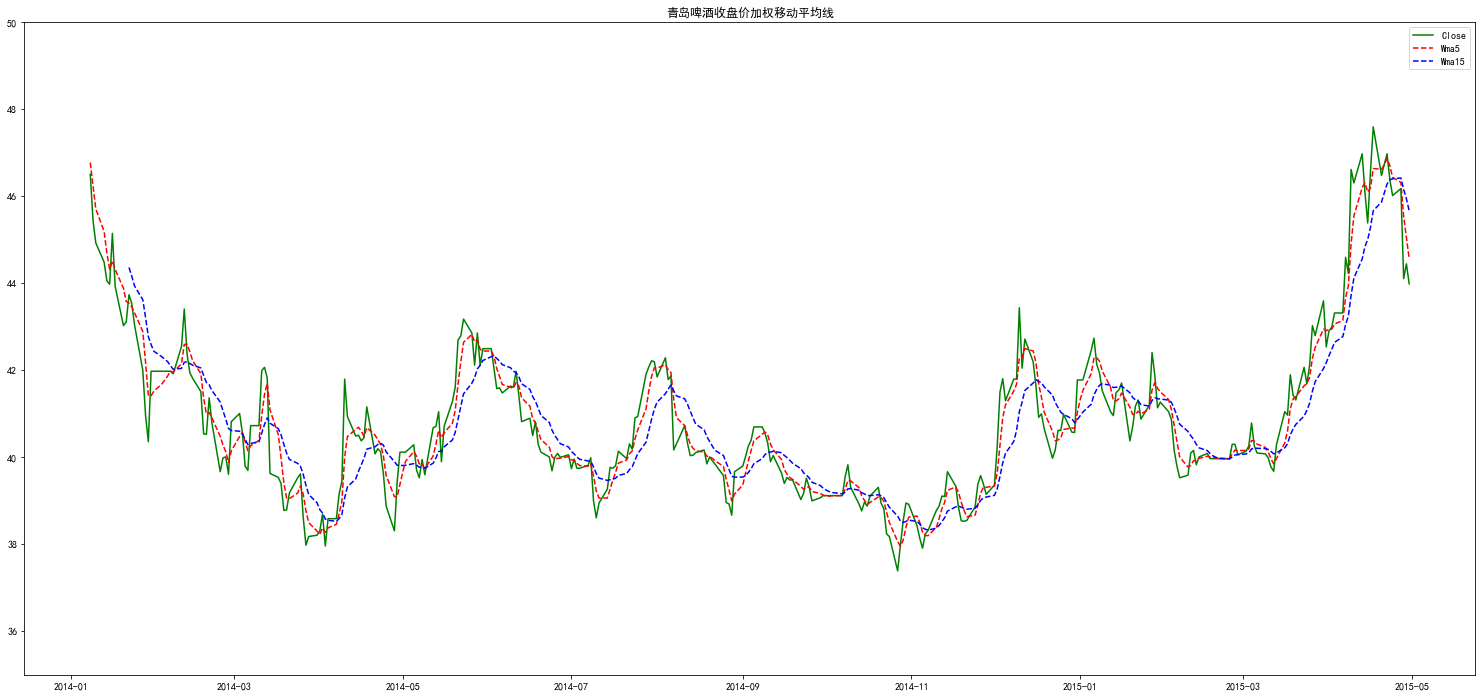

In [24]:
plt.figure(figsize=(26,12))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.plot(Wma15[14:],label="Wma15",color='b',linestyle='dashed')
plt.title("青岛啤酒收盘价加权移动平均线")
plt.ylim(35,50)
plt.legend()

In [25]:
def wmaCal(tsPrice,weight):
    import pandas as pd
    import numpy as np
    k=len(weight)
    arrWeight=np.array(weight)
    Wma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice.index)):
        Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
    return(Wma)

In [26]:
wma5=wmaCal(Close,w)   
wma5.head()
   


Date
2014-01-02     0.000000
2014-01-03     0.000000
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
dtype: float64

In [27]:
wma5=wmaCal(Close,[0.1,0.15,0.2,0.25,0.3])
wma5.tail()

Date
2015-04-24    46.4585
2015-04-27    46.3580
2015-04-28    45.6385
2015-04-29    45.1405
2015-04-30    44.6605
dtype: float64